# 6. Ordinary Differential Equations: Exercise

Name: 

Date: 

(Please submit this .ipynb file with your name and its PDF copy.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

## 1. Linear ODEs
Like the exponential of a real number $x$ is given by
$$ e^{x} = 1 + x + \frac{1}{2} x^2 + \frac{1}{6} x^3 + ...
  = \sum_{k=0}^{\infty} \frac{1}{k!} x^k, $$
the *exponential of a matrix* $X$ is defined as
$$ e^{X} = I + X + \frac{1}{2} X^2 + \frac{1}{6} X^3 + ...
  = \sum_{k=0}^{\infty} \frac{1}{k!} X^k. $$

For one dimensional linear ODE
$$ \frac{dy}{dt} = a y $$
the solution is given by
$$ y(t) = e^{at} y(0), $$
where $y(0)$ is the initial state. 

For an $n$ dimensional linear ODE
$$ \frac{dy}{dt} = A y $$
where $A$ is an $n\times n$ matrix, the solution is given by the matrix exponential
$$ y(t) = e^{At} y(0), $$
where $y(0)$ is an $n$-dimensional initial state.

* Verify this by expanding $e^{At}$ accordint to the definition and differentiating each term by $t$.

The behavior of the matrix exponentioal $e^{At}$ depends on the eivenvalues of $A$; whether the eigenvalues are real or complex, and whether the real part is positive or negative.

Let us visualize solutions for different eigenvalues.

In [2]:
def linear(y, t, A):
    """Linear dynamcal system dy/dt = Ay
    y: n-dimensional state vector
    t: time (not used, for compatibility with odeint())
    A: n*n matrix"""
    # y is an array (row vector), A is a matrix
    return A@y

In [3]:
def linear2D(A, yinit=np.array([[1,0],[0,1],[-1,0],[0,-1]]), t=np.arange(0, 5, 0.1)):
    """Visualizing linear 2D dynamical system"""
    for y0 in yinit:
        y = odeint(linear, y0, t, args=(A,))
        plt.plot(y[0,0], y[0,1], 'o')   # starting point
        plt.plot(y[:,0], y[:,1], '+-')  # trajectory
    plt.axis('equal')
    return np.linalg.eig(A)

1) Real eigenvalues $\lambda_1 > \lambda_2 > 0$

(array([2., 1.]),
 array([[1., 0.],
        [0., 1.]]))

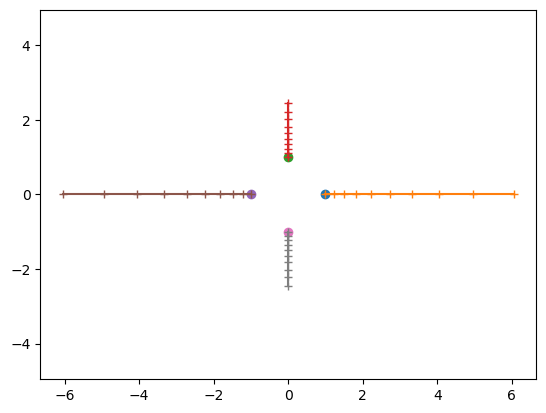

In [4]:
A = np.array([[2, 0], [0, 1]])  # modify this!
linear2D(A, t=np.arange(0, 1, 0.1))

2) Real eigenvalues $\lambda_1 > 0 > \lambda_2$

3) Real eigenvalues $0 > \lambda_1 > \lambda_2$

4) Complex eigenvalues $\lambda_1=a+ib$ and $\lambda_2=a-ib$ with $a>0$

5) Complex eigenvalues $\lambda_1=a+ib$ and $\lambda_2=a-ib$ with $a<0$

c.f. For a 2 by 2 matrix
$$ A = \pmatrix{a & b \\ c & d}, $$
we can analytically derive the eivenvalues from 
$$ \det (A - \lambda I) = (a-\lambda)(d-\lambda) - bc = 0 $$
as
$$ \lambda = \frac{a+d}{2} \pm \sqrt{\frac{(a-d)^2}{4}+ bc}. $$

## 2. Nonlinear ODEs
1) Implement a nonlinear system, such as a pendulum with friction $\mu$:
$$ \frac{d\theta}{dt} = \omega $$
$$ ml^2 \frac{d\omega}{dt} = - \mu \omega - mgl \sin \theta $$

In [5]:
def pendulum(y, t, m=1, l=1, mu=1, g=9.8):
    """pendulum dynamics
    m:mass, l:length, mu:damping, g:gravity"""
    

2) Run a simulation by `odeint()` and show the trajectory as (t, y(t))

3) Show the trajectory in the 2D state space $(\theta, \omega)$

Option) Implement a nonlinear system with time-dependent input, such as a forced pendulum:
$$ \frac{d\theta}{dt} = \omega $$
$$ ml^2 \frac{d\omega}{dt} = - \mu \omega - mgl \sin\theta + a\sin bt$$
and see how the behavior changes with the input.

## 3. Bifurcation
FitzHugh-Nagumo model is an extension of Van der Pol model to approximate spiking behaviors of neurons.
$$ \frac{dv}{dt} = v - \frac{v^3}{3} - w + I $$
$$ \frac{dw}{dt} = \phi (v + a - bw) $$
1) Implement a function and see how the behaviors at different input current $I$.

In [6]:
def fhn(y, t, I=0, a=0.7, b=0.8, phi=0.08):
    """FitzHugh-Nagumo model"""
    v, w = y

    
    

In [7]:
y0 = np.array([0, 0])
t = np.arange(0, 100, 0.1)
y = odeint(fhn, y0, t, args=(0.5,))
plt.plot(t, y, '.-')  # trajectory

RuntimeError: The size of the array returned by func (1) does not match the size of y0 (2).

In [ ]:
plt.plot(y[:,0], y[:,1], '+-')  # phase plot

2) Draw a *bifurcation diagram* showing the max-min of $v$ for different values of $I$.